[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



a) Make of car

b) price of car

c) number of wheels

d) distance driven

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")
carbon_west.head()

,Nation,CO2
0,Albania,2.0
1,Australia,15.4
2,Austria,6.9
3,Belgium,8.3
4,Bosnia,6.2


Part a. Construct a histogram of CO2 emissions. 

array([[<AxesSubplot:title={'center':'CO2'}>]], dtype=object)

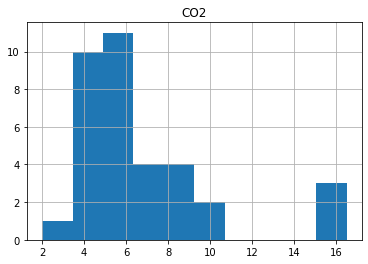

In [2]:
carbon_west.hist(column="CO2")

Part b. Find the mean, median, and standard deviation. 

In [3]:
print(f"mean: {carbon_west['CO2'].mean()}")
print(f"media: {carbon_west['CO2'].median()}")
print(f"std dev: {carbon_west['CO2'].std()}")

mean: 6.717142857142858
media: 5.9
std dev: 3.3569493954627134


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC). 

In [4]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")
murders.tail()

,state,murder
46,WA,3.1
47,WI,3.2
48,WV,4.7
49,WY,2.6
50,DC,24.2


Part a. Find the mean and standard deviation for murders without D.C.

In [5]:
murders_without_dc = murders[murders["state"] != "DC"]
print(f"mean: {murders_without_dc['murder'].mean()}")
print(f"std dev: {murders_without_dc['murder'].std()}")

mean: 4.8740000000000006
std dev: 2.586291174793806


Part b. Find the five-number  summary without D.C. 

In [6]:
print(f'min: {murders_without_dc["murder"].min()} \
        Q1: {murders_without_dc["murder"].quantile(.25)} \
        Median: {murders_without_dc["murder"].median()} \
        Q3: {murders_without_dc["murder"].quantile(.75)} \
        max: {murders_without_dc["murder"].max()}')
print(f'IQR: {murders_without_dc["murder"].quantile(.75) - murders_without_dc["murder"].quantile(.25)}')
print(f'range: {murders_without_dc["murder"].max() - murders_without_dc["murder"].min()}')

murders_without_dc.describe()

min: 1.0         Q1: 2.625         Median: 4.85         Q3: 6.175         max: 12.4
IQR: 3.55
range: 11.4


,murder
count,50.000000
mean,4.874000
std,2.586291
min,1.000000
25%,2.625000
50%,4.850000
75%,6.175000
max,12.400000


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [7]:
print(f"mean: {murders['murder'].mean()}")
print(f"std dev: {murders['murder'].std()}")
print(f'min: {murders["murder"].min()} \
        Q1: {murders["murder"].quantile(.25)} \
        Median: {murders["murder"].median()} \
        Q3: {murders["murder"].quantile(.75)} \
        max: {murders["murder"].max()}')
print(f'IQR: {murders["murder"].quantile(.75) - murders["murder"].quantile(.25)}')
print(f'range: {murders["murder"].max() - murders["murder"].min()}')

murders.describe()

mean: 5.252941176470589
std dev: 3.7253914125190377
min: 1.0         Q1: 2.6500000000000004         Median: 5.0         Q3: 6.45         max: 24.2
IQR: 3.8
range: 23.2


,murder
count,51.000000
mean,5.252941
std,3.725391
min,1.000000
25%,2.650000
50%,5.000000
75%,6.450000
max,24.200000


The mean is more affected by the outlier than the median. The range is more affected by the outlier than the IQR.

**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [8]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")
houses.head()

,case,price,size,new,taxes,bedrooms,baths
0,1,419.85,2048,0,3104,4,2
1,2,219.75,912,0,1173,2,1
2,3,356.55,1654,0,3076,4,2
3,4,300.00,2068,0,1608,3,2
4,5,239.85,1477,0,1454,3,3


Part a. Construct a scatterplot between square feet and price of a home. 

<AxesSubplot:xlabel='size', ylabel='price'>

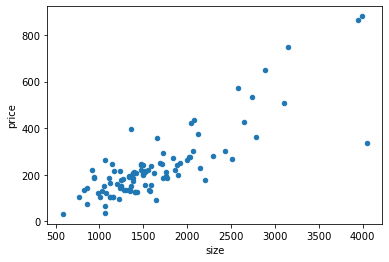

In [9]:
houses.plot(kind="scatter", x="size", y="price")

Part b. Find the correlation between the two variables.

In [10]:
houses.corr()["size"]["price"]

0.8337847885586536

Part c. Find and plot the regression line on top of the scatterplot. 

slope: 0.18989116794379624
intercept: -76.38938210746838


/opt/homebrew/Caskroom/mambaforge/base/envs/anaconda3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


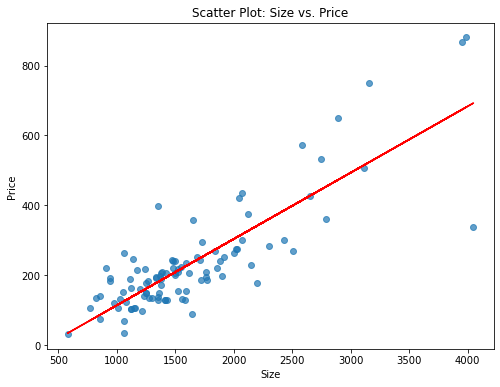

In [11]:
x = houses[["size"]]
y = houses["price"]

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(x, y)

# Retrieve the coefficient (slope) and intercept of the linear regression
slope = model.coef_[0]
intercept = model.intercept_

print(f"slope: {slope}")
print(f"intercept: {intercept}")

plt.figure(figsize=(8,6))
plt.scatter(houses['size'], houses['price'], alpha=0.7)
# Plot the regression line
plt.plot(x.values, model.predict(x.values), color='red', label='Regression Line')
plt.title('Scatter Plot: Size vs. Price')
plt.xlabel('Size')
plt.ylabel('Price')

plt.show()

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new. 

<Figure size 576x432 with 0 Axes>

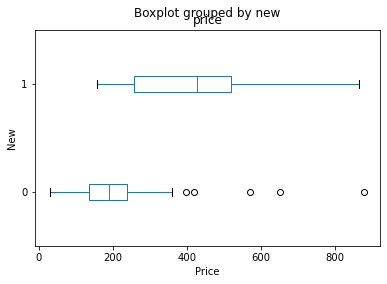

In [12]:
plt.figure(figsize=(8, 6))
houses.boxplot(column='price', by='new', vert=False,grid = False)
plt.xlabel('Price')
plt.ylabel('New')
plt.show()

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

> There is a strong positive linear correlation between house price and house size. We can see this by both the scatterplot and the scatterplot with the regression line. The price of a house increases 0.189 for ever unit increase in size. The correlation is .8337 which is a strong correlation

>There is a positive correlation between house price and whether or not the house is new. New houses have a higher median than used houses. While there are outliers with high prices in the used houses, we can see from the side by side boxplot that the majority are below the median price of a new house.

**Problem 1.22**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness. 

In [13]:
happy = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Happy.dat", sep='\\s+')
happy.head()

,subject,happiness,marital,gender
0,1,1,1,male
1,2,1,1,male
2,3,1,1,male
3,4,1,1,male
4,5,1,1,male


In [14]:
pd.crosstab(happy["marital"],happy["happiness"])

happiness,1,2,3
marital,,,
1,432,504,61
2,92,282,103
3,124,409,135
